In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Try reading the file with a different encoding
df = pd.read_csv('/content/election2024.csv')

In [ ]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [ ]:

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1595    False
1596    False
1597    False
1598    False
1599    False
Length: 1600, dtype: bool

In [ ]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [ ]:
df.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [ ]:
# Assuming 'df' is the DataFrame you've been working with in previous cells
election_data = df  # Assign the DataFrame to 'election_data'

# Check for missing values
missing_values = election_data.isnull().sum()

# Summary statistics for numerical columns
summary_statistics = election_data.describe()

missing_values, summary_statistics

(id                       0
 sex                      0
 age                      0
 federal_district         0
 type_of_city             0
 knows_election_date      0
 will_vote                0
 candidate                0
 television_usage         0
 internet_usage           0
 education                0
 income                   0
 employment               0
 job_type               908
 company_type           721
 weight1                  0
 dtype: int64,
                age      weight1
 count  1600.000000  1600.000000
 mean     49.936250     1.000000
 std      16.901797     0.327084
 min      18.000000     0.468226
 25%      37.000000     0.772224
 50%      49.000000     0.921724
 75%      64.000000     1.158913
 max      90.000000     2.515072)

In [ ]:

# Set up the plotting configuration
plt.style.use('ggplot')
sns.set_context('talk')

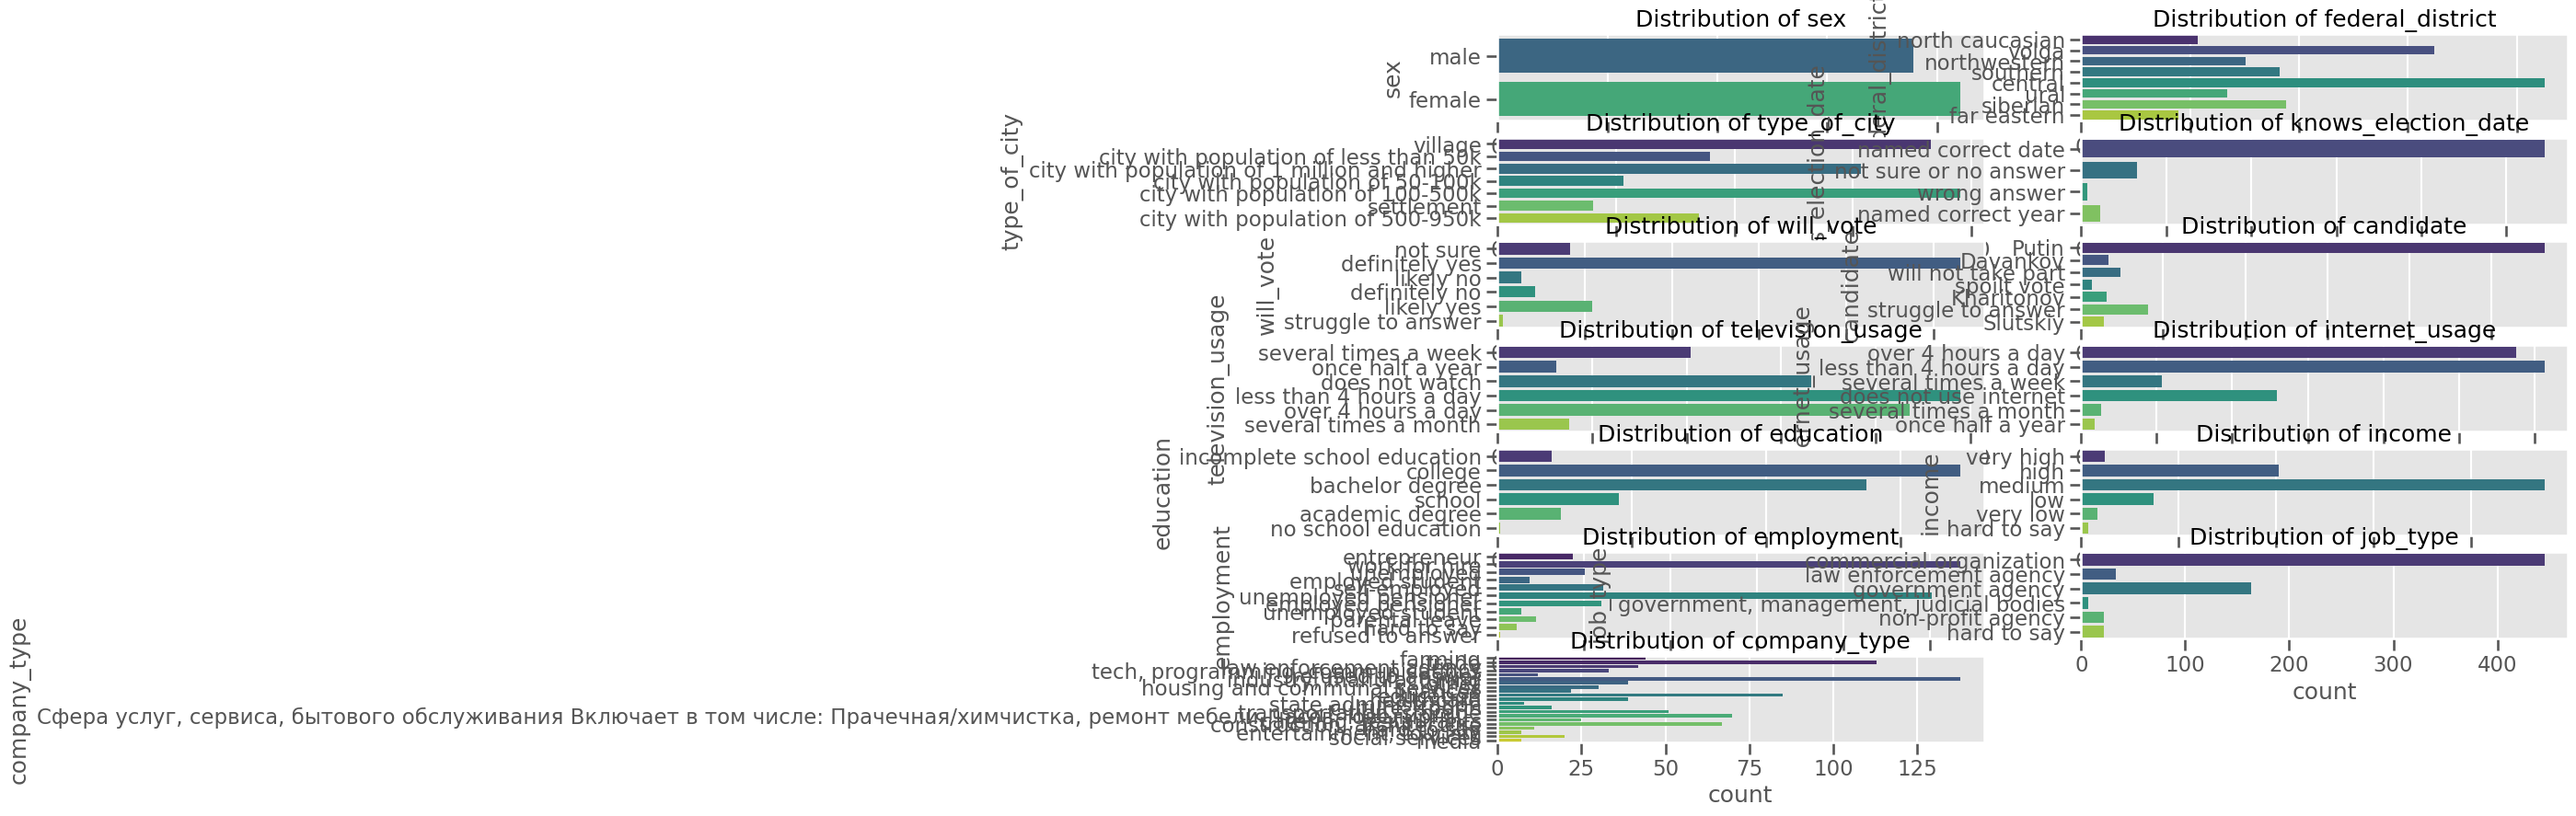

In [ ]:

# Function to plot categorical distributions
def plot_categorical_distributions(df, columns, figsize=(15, 10)):
    fig, axes = plt.subplots(nrows=len(columns)//2 + len(columns)%2, ncols=2, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.countplot(y=col, data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {col}')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# List of categorical columns to plot
categorical_columns = ['sex', 'federal_district', 'type_of_city', 'knows_election_date', 'will_vote', 'candidate', 'television_usage', 'internet_usage', 'education', 'income', 'employment', 'job_type', 'company_type']

# Plot the distributions
plot_categorical_distributions(election_data, categorical_columns)


In [ ]:
# Create age groups
age_bins = [18, 30, 45, 60, 75, 90]
age_labels = ['18-29', '30-44', '45-59', '60-74', '75-90']
election_data['age_group'] = pd.cut(election_data['age'], bins=age_bins, labels=age_labels)


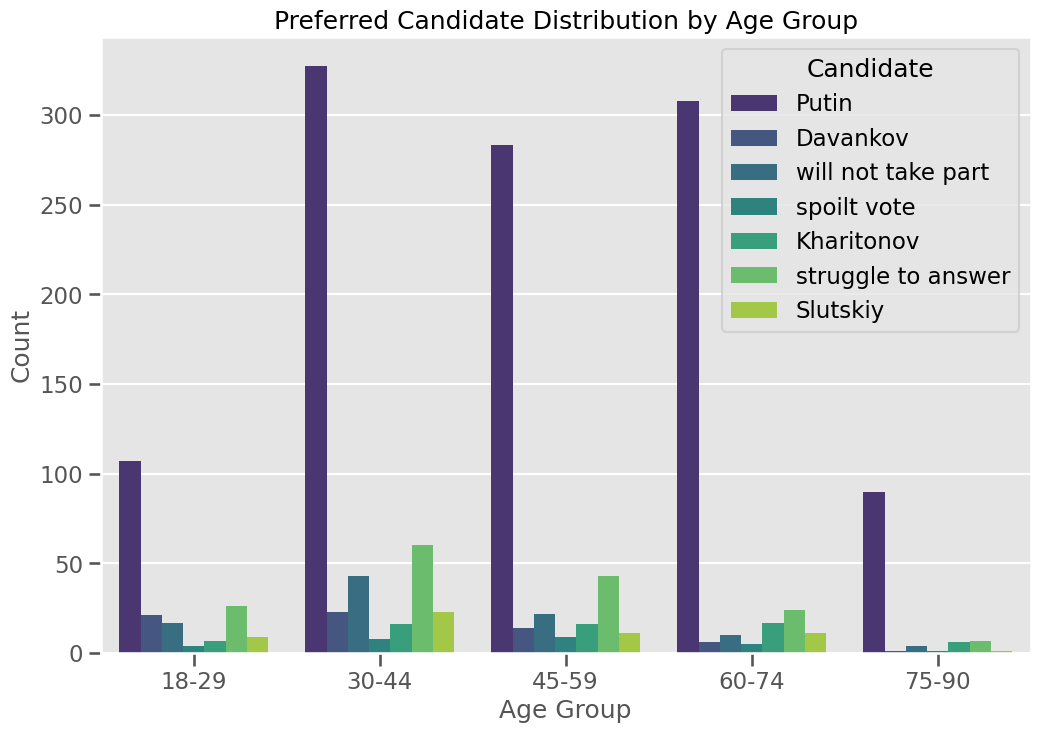

In [ ]:

# Preferred candidate distribution by age group
plt.figure(figsize=(12, 8))
sns.countplot(data=election_data, x='age_group', hue='candidate', palette='viridis')
plt.title('Preferred Candidate Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Candidate')
plt.show()

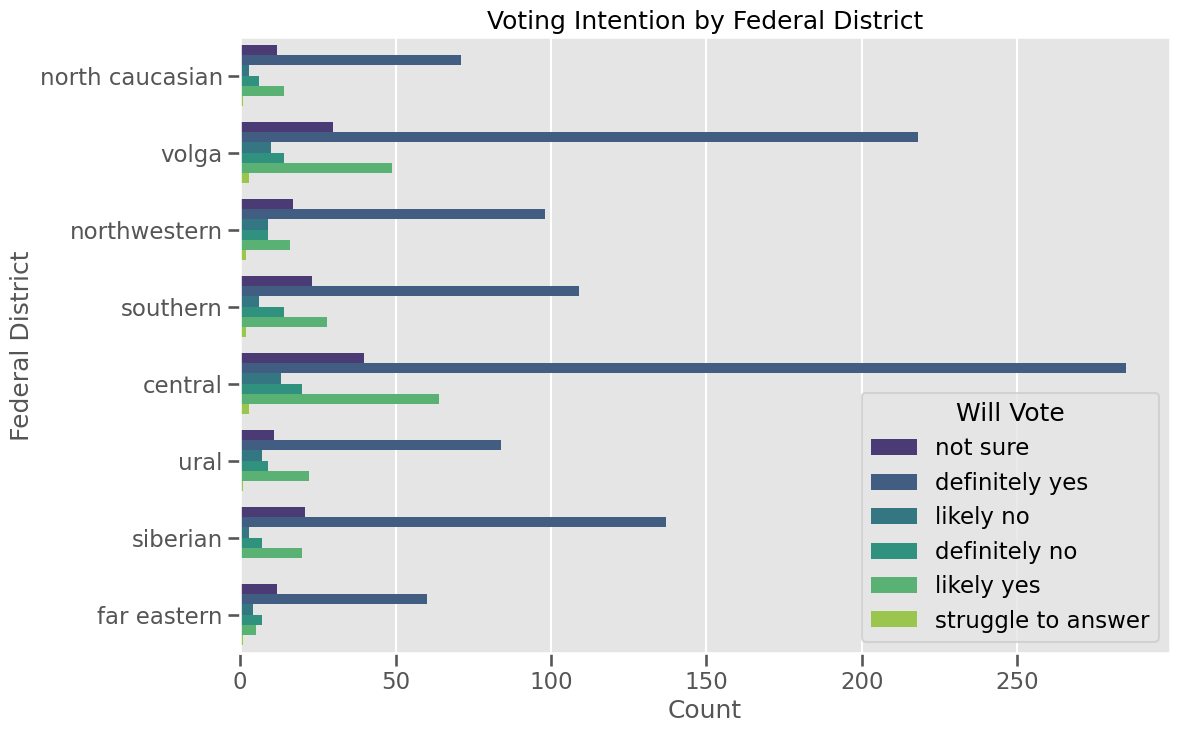

In [ ]:

# Voting intention by federal district
plt.figure(figsize=(12, 8))
sns.countplot(data=election_data, y='federal_district', hue='will_vote', palette='viridis')
plt.title('Voting Intention by Federal District')
plt.xlabel('Count')
plt.ylabel('Federal District')
plt.legend(title='Will Vote')
plt.show()

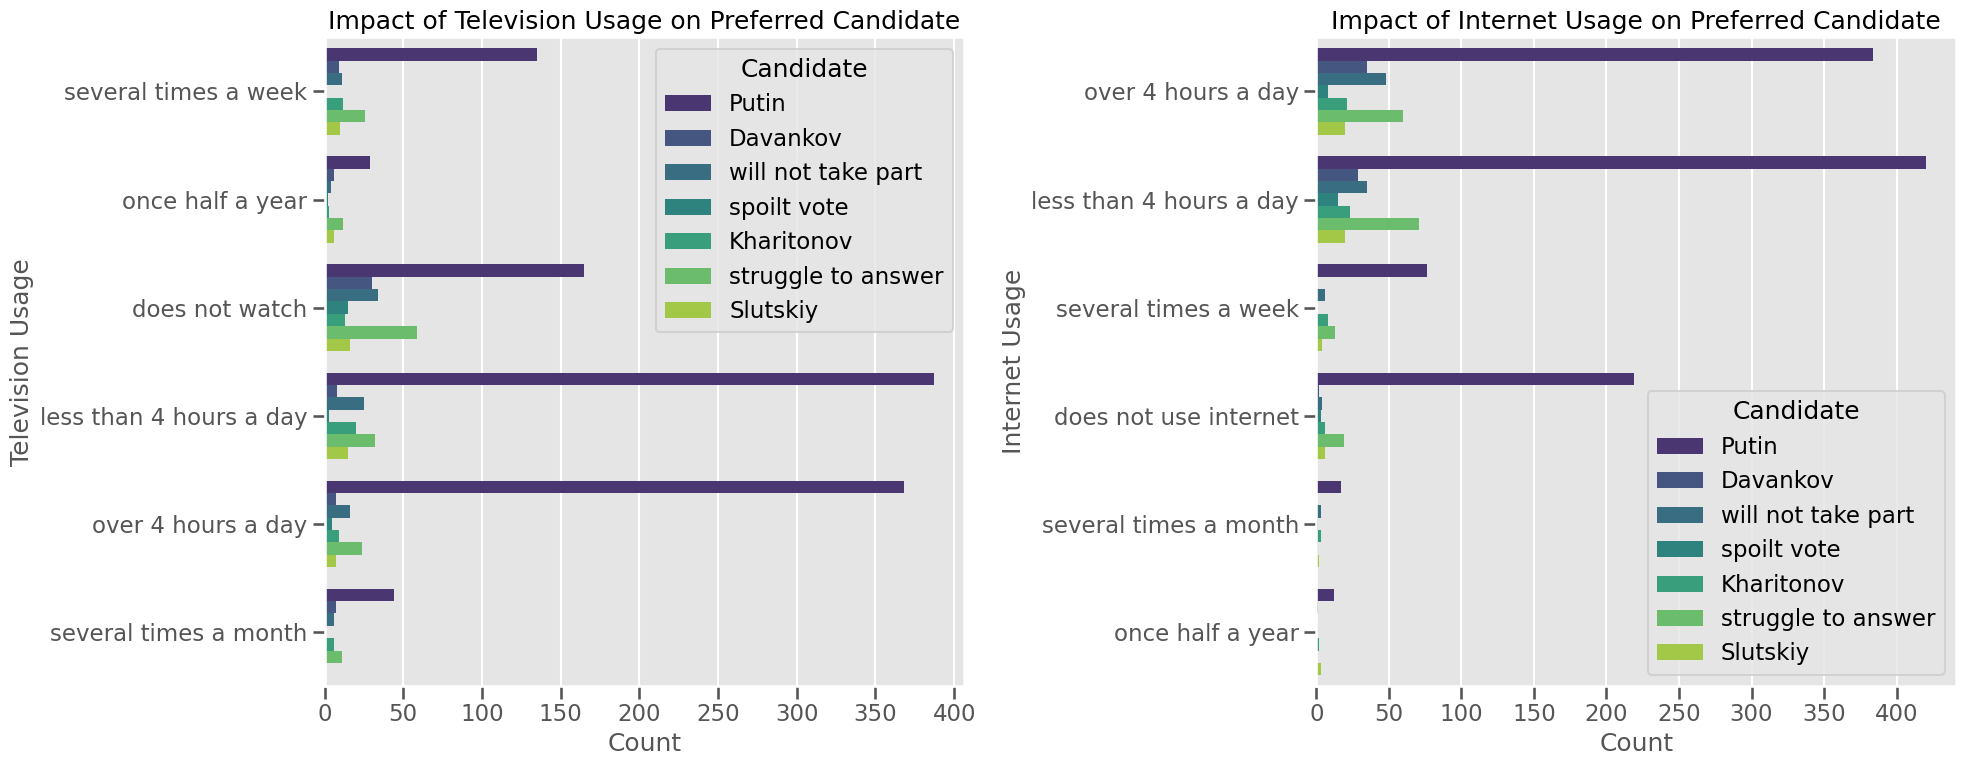

In [ ]:
# Impact of media usage on preferred candidate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.countplot(data=election_data, y='television_usage', hue='candidate', palette='viridis', ax=axes[0])
axes[0].set_title('Impact of Television Usage on Preferred Candidate')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Television Usage')
axes[0].legend(title='Candidate')

sns.countplot(data=election_data, y='internet_usage', hue='candidate', palette='viridis', ax=axes[1])
axes[1].set_title('Impact of Internet Usage on Preferred Candidate')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Internet Usage')
axes[1].legend(title='Candidate')

plt.tight_layout()
plt.show()

In [ ]:
# Create age groups
age_bins = [18, 30, 45, 60, 75, 90]
age_labels = ['18-29', '30-44', '45-59', '60-74', '75-90']
election_data['age_group'] = pd.cut(election_data['age'], bins=age_bins, labels=age_labels)


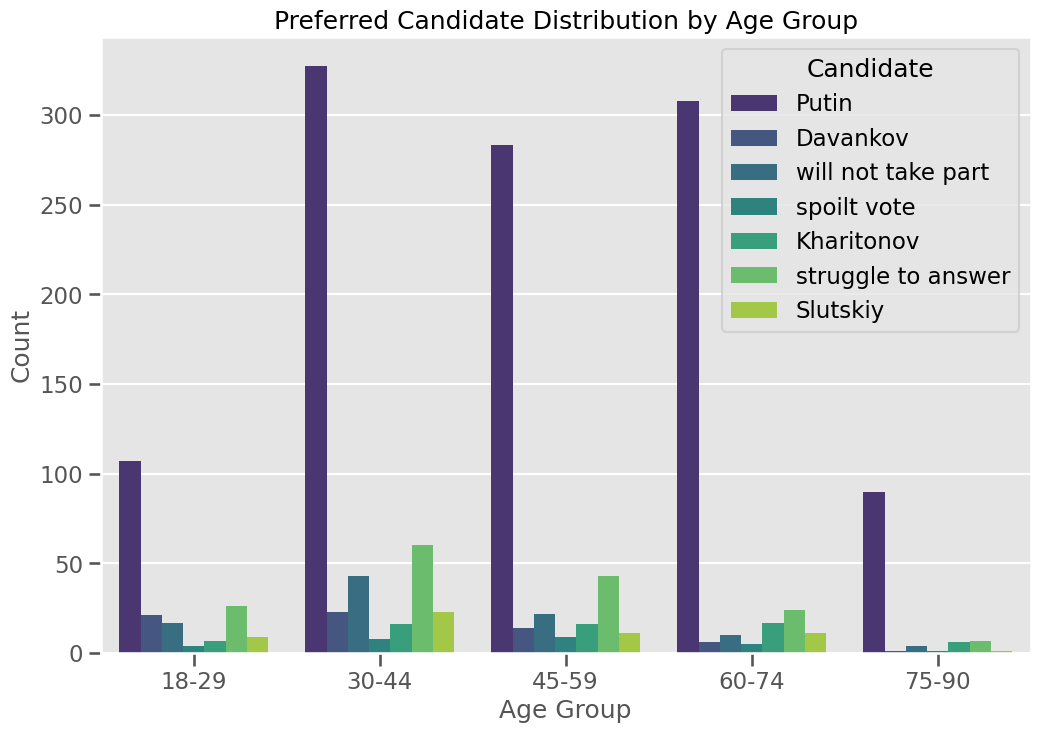

In [ ]:

# Preferred candidate distribution by age group
plt.figure(figsize=(12, 8))
sns.countplot(data=election_data, x='age_group', hue='candidate', palette='viridis')
plt.title('Preferred Candidate Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Candidate')
plt.show()

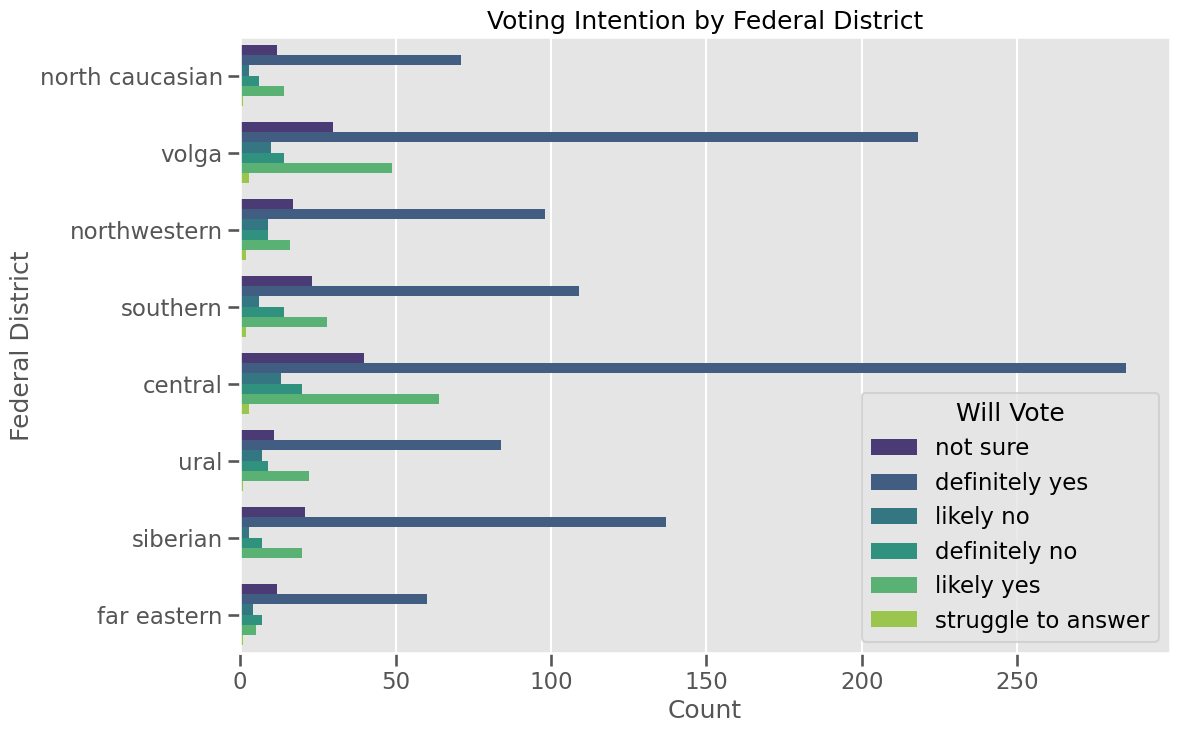

In [ ]:

# Voting intention by federal district
plt.figure(figsize=(12, 8))
sns.countplot(data=election_data, y='federal_district', hue='will_vote', palette='viridis')
plt.title('Voting Intention by Federal District')
plt.xlabel('Count')
plt.ylabel('Federal District')
plt.legend(title='Will Vote')
plt.show()

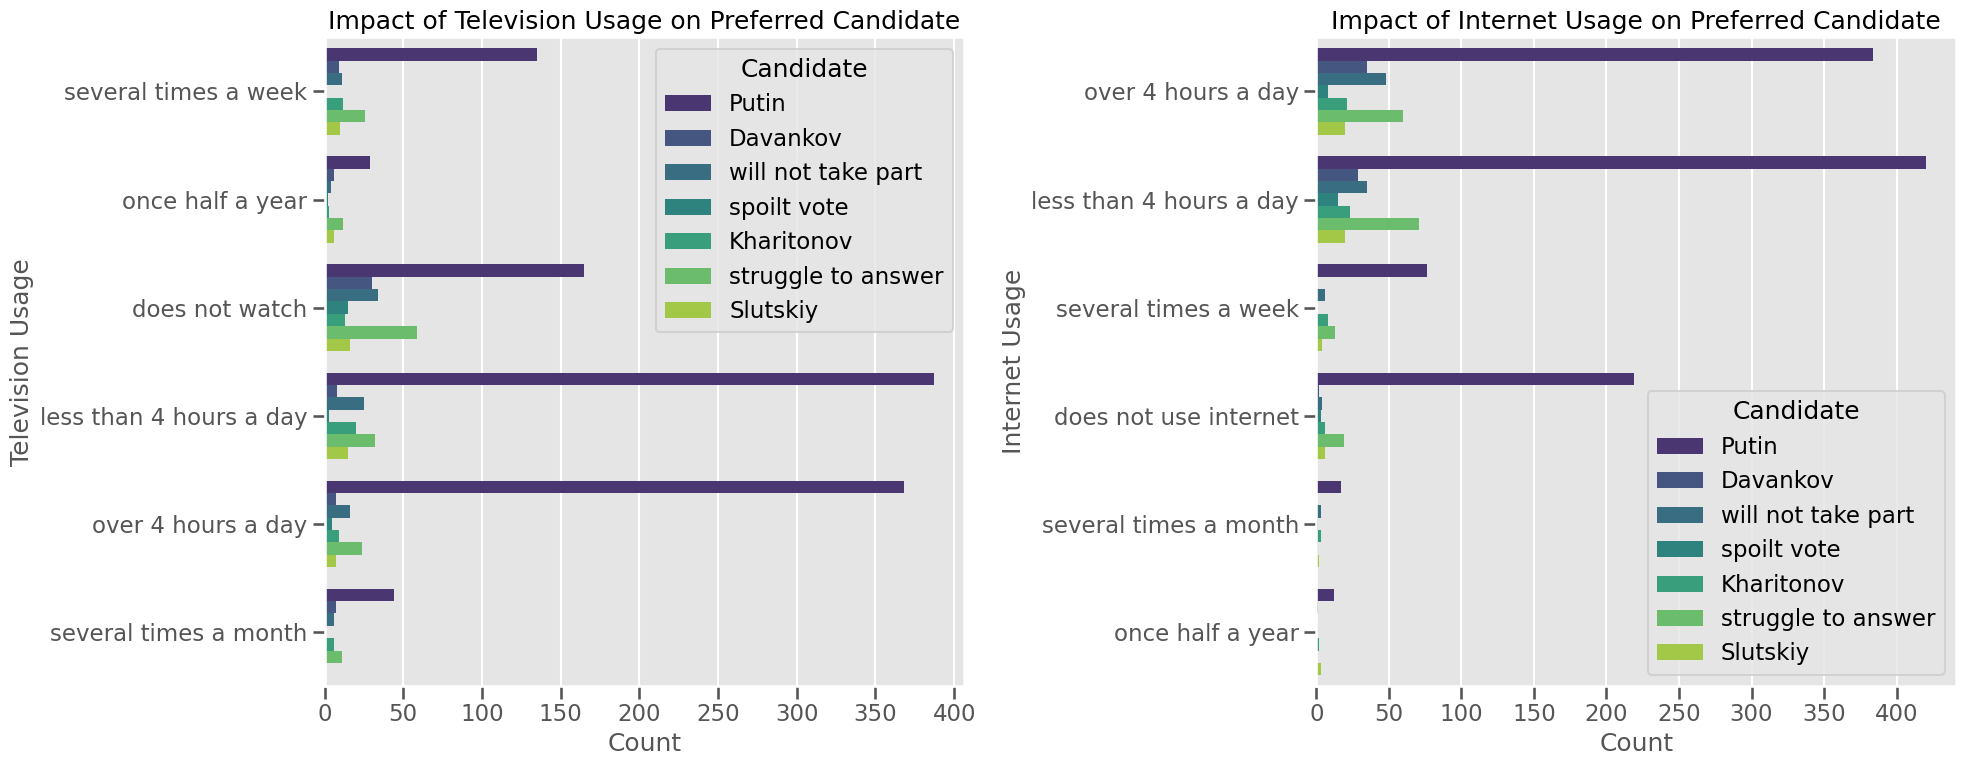

In [ ]:

# Impact of media usage on preferred candidate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.countplot(data=election_data, y='television_usage', hue='candidate', palette='viridis', ax=axes[0])
axes[0].set_title('Impact of Television Usage on Preferred Candidate')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Television Usage')
axes[0].legend(title='Candidate')

sns.countplot(data=election_data, y='internet_usage', hue='candidate', palette='viridis', ax=axes[1])
axes[1].set_title('Impact of Internet Usage on Preferred Candidate')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Internet Usage')
axes[1].legend(title='Candidate')

plt.tight_layout()
plt.show()

In [ ]:

#Finding Correlation
cn=election_data.corr(numeric_only=True) # Include numeric_only parameter
cn

,age,weight1
age,1.000000,-0.319715
weight1,-0.319715,1.000000


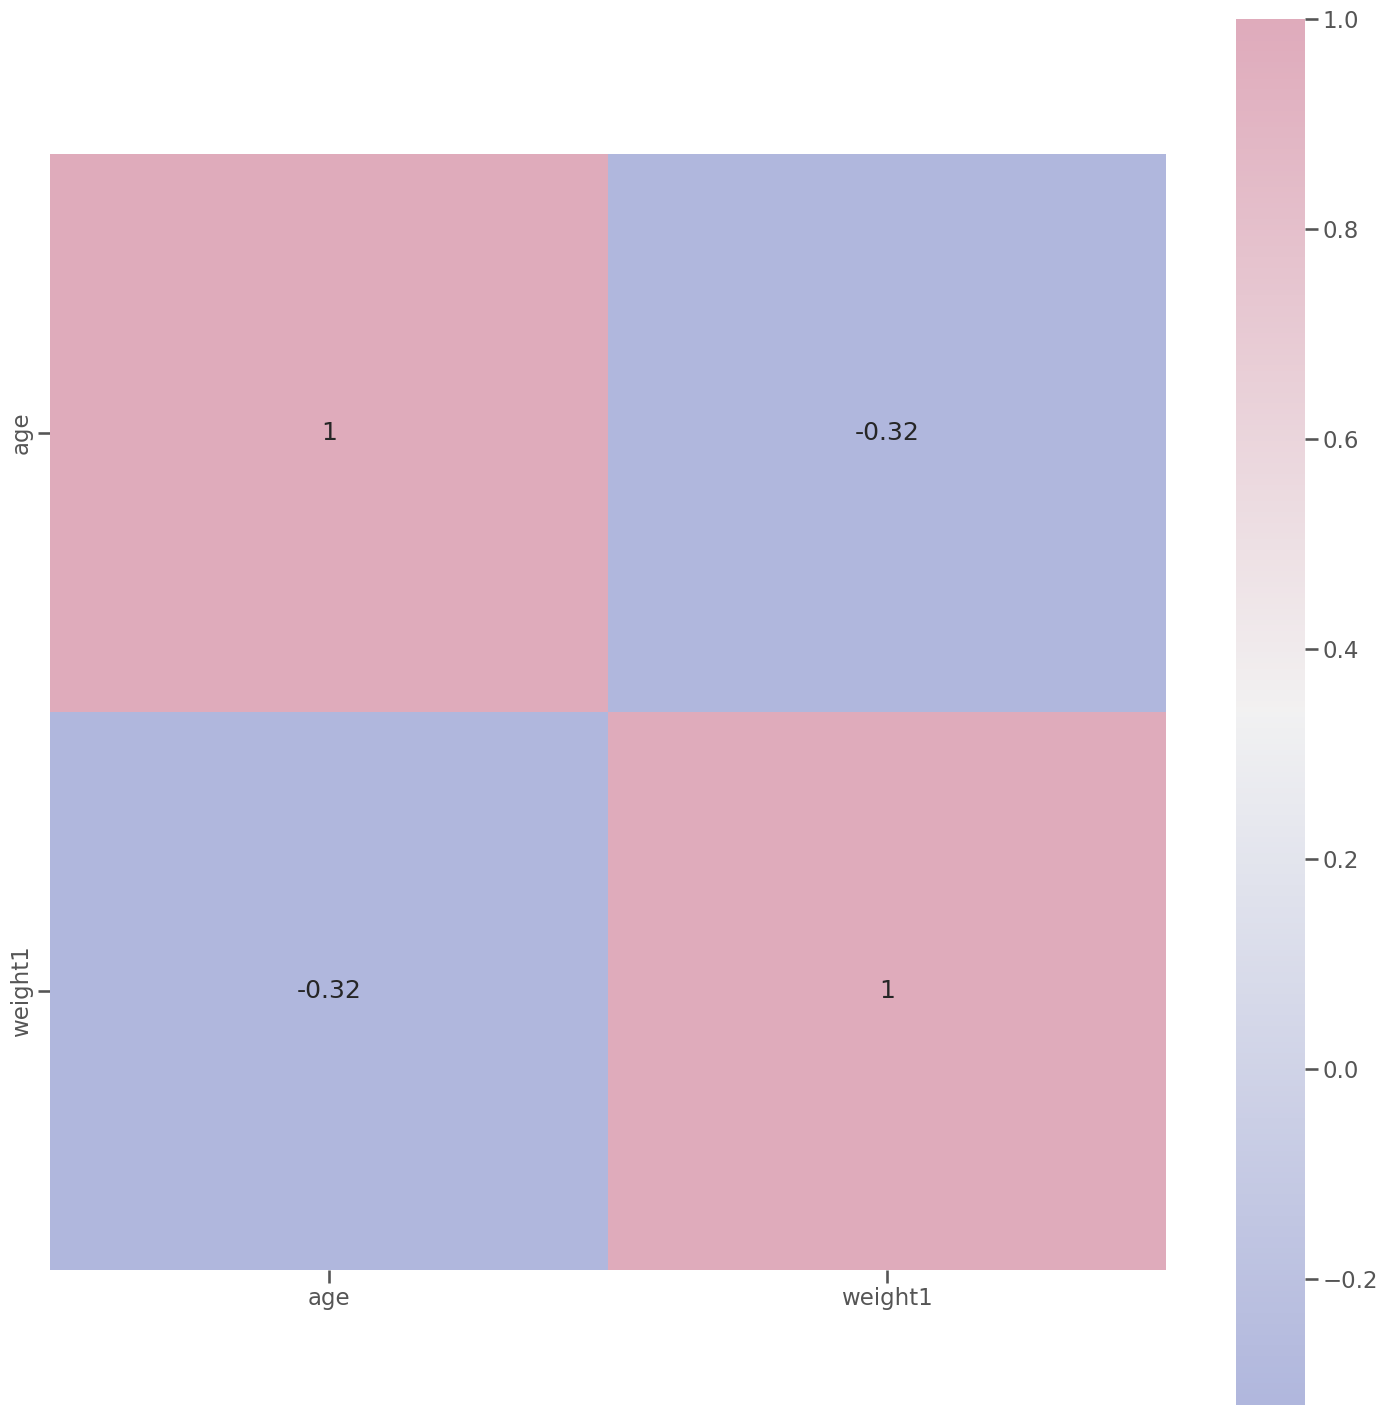

In [ ]:
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

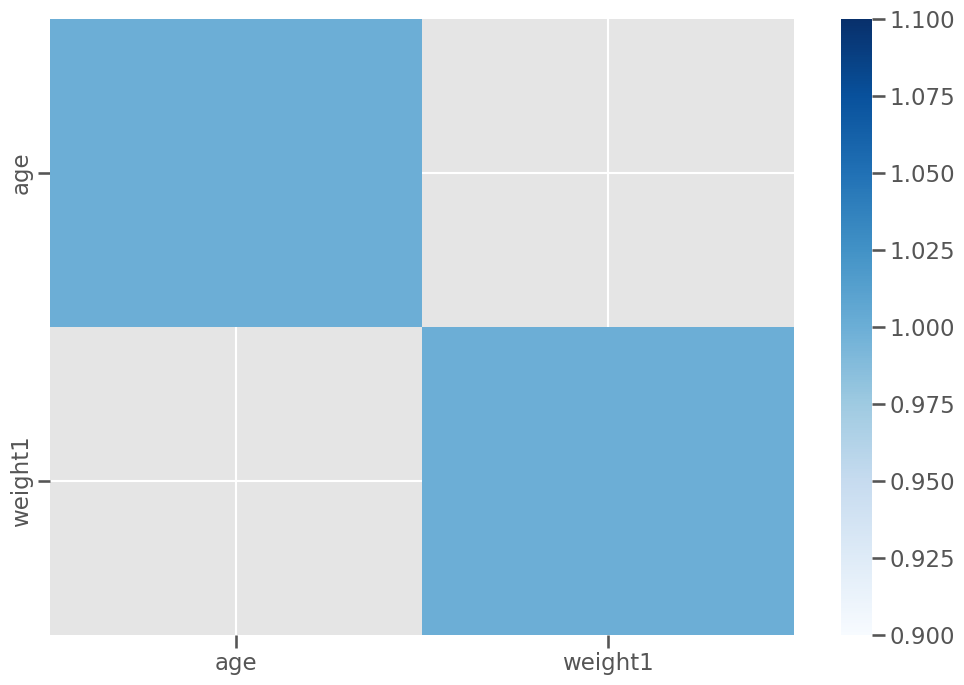

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [ ]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split

# Assuming 'election_data' is your DataFrame and 'candidate' is the target variable
# Replace '...' with the actual names of the features you want to include
feature_columns = ['television_usage', 'internet_usage', 'age', 'education']  # Example features
X = election_data[feature_columns]  # Define X with your features
y = election_data['candidate']   # Define y with your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming 'election_data' is your DataFrame and 'candidate' is the target variable
# Replace '...' with the actual names of the features you want to include
feature_columns = ['television_usage', 'internet_usage', 'age', 'education']  # Example features
X = election_data[feature_columns]  # Define X with your features
y = election_data['candidate']   # Define y with your target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over feature columns and encode string values
for col in X.columns:
    if X[col].dtype == 'object':  # Check if column is of object (string) type
        X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train) # Now the model should fit without the ValueError

LogisticRegression(random_state=0)

In [ ]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array(['Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Put

In [ ]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

                    precision    recall  f1-score   support

          Davankov       0.00      0.00      0.00        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.70      1.00      0.83       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.00      0.00      0.00        35
will not take part       0.00      0.00      0.00        22

          accuracy                           0.70       400
         macro avg       0.10      0.14      0.12       400
      weighted avg       0.49      0.70      0.58       400



In [ ]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array(['struggle to answer', 'Putin', 'struggle to answer', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'will not take part',
       'struggle to answer', 'Putin', 'Putin', 'Putin',
       'struggle to answer', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Davankov', 'Kharitonov', 'Putin', 'Davankov',
       'struggle to answer', 'Putin', 'struggle to answer', 'Putin',
       'struggle to answer', 'Putin', 'Putin', 'Putin',
       'struggle to answer', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Davankov', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'spoilt vote', 'Putin',
       'Putin', 'struggle to answer', 'struggle to answer', 'Putin',
       'Putin', 'Davankov', 'Putin', 'Kharitonov', 'Davankov', 'Putin',
       'Putin', 'Putin', 'Putin', '

In [ ]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

                    precision    recall  f1-score   support

          Davankov       0.09      0.10      0.09        21
        Kharitonov       0.06      0.05      0.06        19
             Putin       0.75      0.78      0.77       281
          Slutskiy       0.20      0.07      0.10        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.05      0.06      0.05        35
will not take part       0.00      0.00      0.00        22

          accuracy                           0.56       400
         macro avg       0.16      0.15      0.15       400
      weighted avg       0.54      0.56      0.55       400



In [ ]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array(['struggle to answer', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'will not take part',
       'struggle to answer', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'will not take part', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Davankov',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Pu

In [ ]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)


                    precision    recall  f1-score   support

          Davankov       0.14      0.05      0.07        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.72      0.97      0.83       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.12      0.03      0.05        35
will not take part       0.20      0.05      0.07        22

          accuracy                           0.69       400
         macro avg       0.17      0.16      0.15       400
      weighted avg       0.53      0.69      0.59       400



In [ ]:
#Fitting Gaussian Naive Bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)


GaussianNB()

In [ ]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array(['Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Put

In [ ]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

                    precision    recall  f1-score   support

          Davankov       0.00      0.00      0.00        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.70      1.00      0.83       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.00      0.00      0.00        35
will not take part       0.00      0.00      0.00        22

          accuracy                           0.70       400
         macro avg       0.10      0.14      0.12       400
      weighted avg       0.49      0.70      0.58       400



In [ ]:
#Fitting Multinomial Naive Bayes classifier to the training set
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array(['Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Put

In [ ]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

                    precision    recall  f1-score   support

          Davankov       0.00      0.00      0.00        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.70      1.00      0.83       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.00      0.00      0.00        35
will not take part       0.00      0.00      0.00        22

          accuracy                           0.70       400
         macro avg       0.10      0.14      0.12       400
      weighted avg       0.49      0.70      0.58       400



In [ ]:
#Fitting SVC to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array(['Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Put

In [ ]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

                    precision    recall  f1-score   support

          Davankov       0.00      0.00      0.00        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.70      1.00      0.83       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.00      0.00      0.00        35
will not take part       0.00      0.00      0.00        22

          accuracy                           0.70       400
         macro avg       0.10      0.14      0.12       400
      weighted avg       0.49      0.70      0.58       400



In [ ]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array(['struggle to answer', 'Putin', 'struggle to answer', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'will not take part',
       'Putin', 'Putin', 'Putin', 'Putin', 'struggle to answer', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Davankov',
       'will not take part', 'Putin', 'Davankov', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'struggle to answer', 'Putin', 'Putin',
       'struggle to answer', 'Putin', 'Putin', 'Putin',
       'struggle to answer', 'Putin', 'Putin', 'Davankov', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Slutskiy', 'Putin', 'Puti

In [ ]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

                    precision    recall  f1-score   support

          Davankov       0.21      0.14      0.17        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.73      0.83      0.78       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.11      0.11      0.11        35
will not take part       0.06      0.05      0.05        22

          accuracy                           0.60       400
         macro avg       0.16      0.16      0.16       400
      weighted avg       0.54      0.60      0.57       400



In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform y_train to numerical labels
y_train_encoded = le.fit_transform(y_train)

# Initialize and fit the XGBoost model with encoded labels
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([5, 2, 5, 2, 2, 2, 2, 2, 2, 6, 0, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 2, 5, 2, 2, 6, 5, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2,
       2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 1, 2, 2, 6, 2, 2, 1, 6, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 5, 2, 2, 0, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 3,
       2, 5, 2, 2, 2, 2, 5, 6, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 5, 6, 5,
       2, 2, 2, 2, 5, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 6, 2, 2, 6, 0, 2, 2,
       2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       6, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 6, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 6, 5, 6, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 0, 2, 2, 6, 2, 5, 2, 2,
       2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 5,

In [ ]:
#Predicting result using testing data and converting to original labels
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred = le.inverse_transform(y_xgb_pred) # Convert numerical predictions back to original labels

#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

                    precision    recall  f1-score   support

          Davankov       0.33      0.10      0.15        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.74      0.85      0.79       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.07      0.09      0.08        35
will not take part       0.10      0.09      0.10        22

          accuracy                           0.61       400
         macro avg       0.18      0.16      0.16       400
      weighted avg       0.55      0.61      0.58       400



In [ ]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [ ]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array(['Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Put

In [ ]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

                    precision    recall  f1-score   support

          Davankov       0.00      0.00      0.00        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.70      1.00      0.83       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.00      0.00      0.00        35
will not take part       0.00      0.00      0.00        22

          accuracy                           0.70       400
         macro avg       0.10      0.14      0.12       400
      weighted avg       0.49      0.70      0.58       400



In [ ]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array(['Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Davankov', 'Putin', 'Putin',
       'struggle to answer', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'struggle to answer', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Davankov', 'Putin', 'Putin', 'Putin',
       'struggle to answer', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'struggle to answer', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin', 'Putin',
       'Putin', 'Putin', 'struggle to answer', 'Putin', 'Putin', 'Putin',
       'Putin', 'Puti

In [ ]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

                    precision    recall  f1-score   support

          Davankov       0.40      0.10      0.15        21
        Kharitonov       0.00      0.00      0.00        19
             Putin       0.72      0.94      0.81       281
          Slutskiy       0.00      0.00      0.00        15
       spoilt vote       0.00      0.00      0.00         7
struggle to answer       0.04      0.03      0.03        35
will not take part       0.50      0.05      0.08        22

          accuracy                           0.67       400
         macro avg       0.24      0.16      0.16       400
      weighted avg       0.56      0.67      0.59       400



In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Encode target variable 'y' to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y) # Fit and transform the target variable


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y_encoded, cv=kf) # Use encoded 'y'

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))


Logistic regression models' average accuracy: 0.705
Decision tree models' average accuracy: 0.5575
KNN models' average accuracy: 0.6793750000000001
Gaussian naive bayes models' average accuracy: 0.705
Multinomial naive bayes models' average accuracy: 0.705
Support Vector Classifier models' average accuracy: 0.705
Random forest models' average accuracy: 0.6081249999999999
XGBoost models' average accuracy: 0.6425
Multi-layer perceptron models' average accuracy: 0.705
Gradient boost models' average accuracy: 0.686875


In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)



# XGBoost model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert string labels to numerical labels
xgb_model_scores = cross_val_score(xgb_model,X, y_encoded, cv=kf)  # Use encoded labels


# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.7050000000000001
Decision tree models' average accuracy: 0.543125
KNN models' average accuracy: 0.6706249999999999
Gaussian naive bayes models' average accuracy: 0.7050000000000001
Multinomial naive bayes models' average accuracy: 0.7050000000000001
Support Vector Classifier models' average accuracy: 0.7050000000000001
Random forest models' average accuracy: 0.6006250000000001
XGBoost models' average accuracy: 0.638125
Multi-layer perceptron models' average accuracy: 0.7050000000000001
Gradient boost models' average accuracy: 0.6837500000000001


In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

k = 10
kf = StratifiedKFold(n_splits=k)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)


# XGBoost model
le = LabelEncoder()
y_encoded = le.fit_transform(y) # Encode target variable before using XGBoost
xgb_model_scores = cross_val_score(xgb_model,X, y_encoded, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))


Logistic regression models' average accuracy: 0.7050000000000001
Decision tree models' average accuracy: 0.543125
KNN models' average accuracy: 0.6706249999999999
Gaussian naive bayes models' average accuracy: 0.7050000000000001
Multinomial naive bayes models' average accuracy: 0.7050000000000001
Support Vector Classifier models' average accuracy: 0.7050000000000001
Random forest models' average accuracy: 0.596875
XGBoost models' average accuracy: 0.638125
Multi-layer perceptron models' average accuracy: 0.7050000000000001
Gradient boost models' average accuracy: 0.6831250000000001
